In [52]:
import pandas as pd

# Carregar o arquivo CSV
cancer = pd.read_csv('cancer_data.csv')

# Verificar as primeiras linhas dos dados
print(cancer.head())

# Verificar a estrutura das colunas
print(cancer.info())


   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       2   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       2   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       1   56    1      0.0      90.0       90.0       NaN   
3   5.0   210       2   57    1      1.0      90.0       60.0    1150.0   
4   1.0   883       2   60    1      0.0     100.0       90.0       NaN   

   wt.loss  
0      NaN  
1     15.0  
2     15.0  
3     11.0  
4      0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   p

In [53]:
# Resumo das variáveis numéricas
print(cancer[['time', 'age', 'meal.cal', 'wt.loss']].describe())


              time         age     meal.cal     wt.loss
count   228.000000  228.000000   181.000000  214.000000
mean    305.232456   62.447368   928.779006    9.831776
std     210.645543    9.073457   402.174707   13.139902
min       5.000000   39.000000    96.000000  -24.000000
25%     166.750000   56.000000   635.000000    0.000000
50%     255.500000   63.000000   975.000000    7.000000
75%     396.500000   69.000000  1150.000000   15.750000
max    1022.000000   82.000000  2600.000000   68.000000


In [60]:
# Resumo das variáveis categóricas
print(cancer['sex'].value_counts())
print(cancer['status'].value_counts())


sex
1    138
2     90
Name: count, dtype: int64
status
2    165
1     63
Name: count, dtype: int64


In [66]:
# Remover valores ausentes
cancer = cancer.dropna()


In [71]:
pip install lifelines


  Using cached lifelines-0.30.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached formulaic-1.0.2-py3-none-any.whl.metadata (6.8 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl.metadata (6.7 kB)
Using cached lifelines-0.30.0-py3-none-any.whl (349 kB)
Using cached formulaic-1.0.2-py3-none-any.whl (94 kB)
Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)


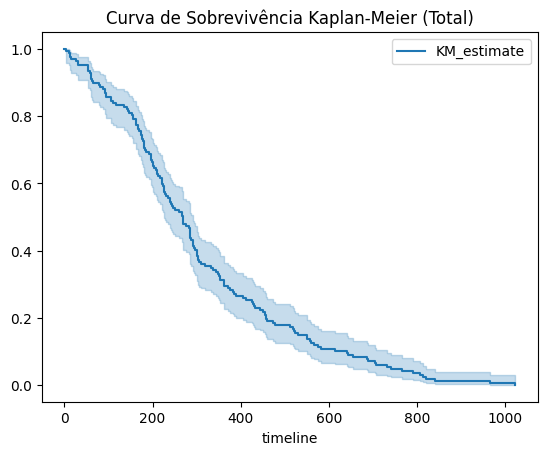

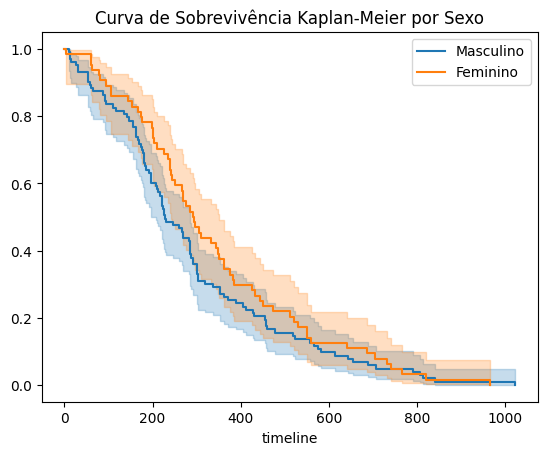

In [73]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Criando o modelo Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustando o modelo para a variável 'status' e 'time'
kmf.fit(cancer['time'], event_observed=cancer['status'])

# Visualizando a curva de Kaplan-Meier para toda a amostra
kmf.plot()
plt.title("Curva de Sobrevivência Kaplan-Meier (Total)")
plt.show()

# Para visualizar por sexo, separamos os grupos
kmf.fit(cancer['time'][cancer['sex'] == 1], event_observed=cancer['status'][cancer['sex'] == 1], label='Masculino')
ax = kmf.plot()

kmf.fit(cancer['time'][cancer['sex'] == 2], event_observed=cancer['status'][cancer['sex'] == 2], label='Feminino')
kmf.plot(ax=ax)
plt.title("Curva de Sobrevivência Kaplan-Meier por Sexo")
plt.show()


In [75]:
from lifelines import CoxPHFitter

# Ajustando o modelo de Cox
cph = CoxPHFitter()
cph.fit(cancer[['time', 'status', 'age', 'sex', 'meal.cal', 'wt.loss']], duration_col='time', event_col='status')

# Exibindo os resultados do modelo de Cox
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 167 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 167
   partial log-likelihood = -690.08
         time fit was run = 2024-11-13 19:24:41 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.00      1.00      0.01           -0.02            0.02                0.98                1.02
sex       -0.20      0.82      0.16           -0.52            0.12                0.59                1.12
meal.cal  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.00      1.00      0.01           -0.01            0.01                0.99                1.01

           cmp to     z    p  -log2(p)
covariate                             
age          0.00  0.24 0.81      0.30
sex          0.00 -1.25 0.21      2.25
meal.cal     0.00 -0.71 0.48      1.06
wt.loss      0.00 -0.35 0.73      0.45
---
Concordance = 0.57
Partial AIC = 1388.17
log-likelihood ratio test = 2.20 on 4 df
-log2(p) of ll-ratio test = 0.52

In [84]:
from lifelines import WeibullAFTFitter

# Ajustando o modelo Weibull
aft = WeibullAFTFitter()
aft.fit(cancer[['time', 'status', 'age', 'sex', 'meal.cal', 'wt.loss']], duration_col='time', event_col='status')

# Exibindo os resultados do modelo Weibull
aft.print_summary()


<lifelines.WeibullAFTFitter: fitted with 167 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
   number of observations = 167
number of events observed = 167
           log-likelihood = -1105.56
         time fit was run = 2024-11-13 19:25:51 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                  
lambda_ age       -0.00      1.00      0.01           -0.01            0.01                0.99                1.01
        meal.cal   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
        sex        0.14      1.15      0.11           -0.07            0.35                0.93                1.42
        wt.loss    0.00      1.00      0.00           -0.01            0.01                0.99                1.01
        Intercept  5.62    274.68      0.49            4.66            6.57              105.57              714.67
rho_    Intercept  0.40      1.50      0.06            0.29            0.52                1.33                1.69

                   cmp to     z      p  -log2(p)
param   covariate                               
lambda_ age          0.00 -0.29   0.77      0.37
        meal.cal     0.00  0.87   0.38      1.38
        sex          0.00  1.30   0.19      2.36
        wt.loss      0.00  0.36   0.72      0.48
        Intercept    0.00 11.51 <0.005     99.43
rho_    Intercept    0.00  6.70 <0.005     35.53
---
Concordance = 0.56
AIC = 2223.12
log-likelihood ratio test = 2.67 on 4 df
-log2(p) of ll-ratio test = 0.70

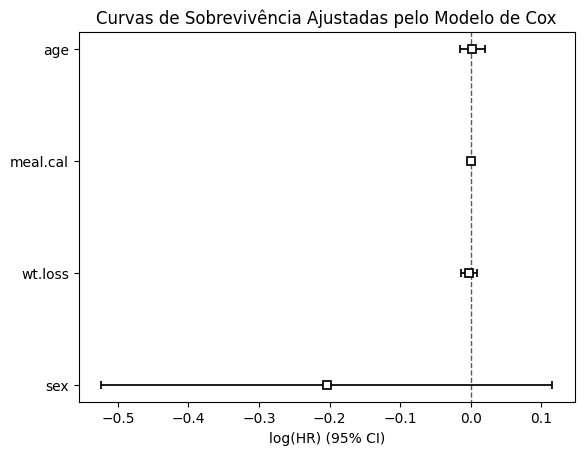

In [100]:
cph.plot()
plt.title("Curvas de Sobrevivência Ajustadas pelo Modelo de Cox")
plt.show()


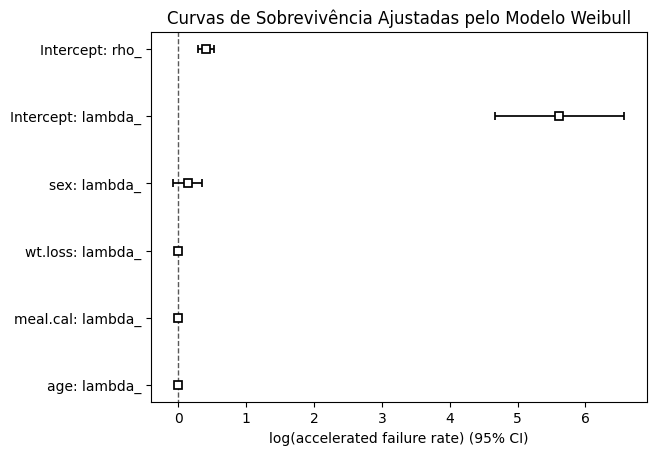

In [106]:
aft.plot()
plt.title("Curvas de Sobrevivência Ajustadas pelo Modelo Weibull")
plt.show()


In [125]:
# Exibir o resumo completo do modelo de Cox
cox_summary = cph.summary
print(cox_summary.columns)  # Exibe as colunas do resumo

# Exibir as primeiras linhas do resumo para verificar os nomes das colunas
print(cox_summary.head())


Index(['coef', 'exp(coef)', 'se(coef)', 'coef lower 95%', 'coef upper 95%',
       'exp(coef) lower 95%', 'exp(coef) upper 95%', 'cmp to', 'z', 'p',
       '-log2(p)'],
      dtype='object')
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
age        0.002187   1.002190  0.009194       -0.015832        0.020207   
sex       -0.204072   0.815403  0.162996       -0.523538        0.115394   
meal.cal  -0.000153   0.999847  0.000217       -0.000579        0.000273   
wt.loss   -0.002043   0.997959  0.005916       -0.013639        0.009552   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
age                   0.984292             1.020412     0.0  0.237891   
sex                   0.592421             1.122315     0.0 -1.252009   
meal.cal              0.999421             1.000273     0.0 

In [124]:
# Supondo que os nomes das colunas sejam diferentes, por exemplo:
# 'exp(coef) lower 95%' e 'exp(coef) upper 95%'

for index, row in cox_summary.iterrows():
    var_name = index
    hr = row['exp(coef)']
    ci_lower = row['exp(coef) lower 95%']  # Ajuste o nome da coluna aqui
    ci_upper = row['exp(coef) upper 95%']  # Ajuste o nome da coluna aqui

    print(f'Variável: {var_name}')
    print(f'Razão de risco (HR): {hr:.2f}')
    print(f'Intervalo de Confiança 95%: [{ci_lower:.2f}, {ci_upper:.2f}]')

    # Interpretação
    if hr > 1:
        print("A variável está associada a um maior risco de morte.")
    elif hr < 1:
        print("A variável está associada a um menor risco de morte.")
    else:
        print("A variável não tem efeito sobre o risco de morte.")

    print("-" * 50)


Variável: age
Razão de risco (HR): 1.00
Intervalo de Confiança 95%: [0.98, 1.02]
A variável está associada a um maior risco de morte.
--------------------------------------------------
Variável: sex
Razão de risco (HR): 0.82
Intervalo de Confiança 95%: [0.59, 1.12]
A variável está associada a um menor risco de morte.
--------------------------------------------------
Variável: meal.cal
Razão de risco (HR): 1.00
Intervalo de Confiança 95%: [1.00, 1.00]
A variável está associada a um menor risco de morte.
--------------------------------------------------
Variável: wt.loss
Razão de risco (HR): 1.00
Intervalo de Confiança 95%: [0.99, 1.01]
A variável está associada a um menor risco de morte.
--------------------------------------------------


In [148]:
print(data.columns)  # Exibe os nomes de todas as colunas em seu DataFrame



Index(['inst', 'time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno',
       'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')


In [150]:
print(data.isnull().sum())



inst          1
time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64


In [151]:
data = data.dropna()


In [153]:
data = data.fillna(data.mean())


In [154]:
weibull_model.fit(data, duration_col='time', event_col='status')


<lifelines.WeibullAFTFitter: fitted with 167 total observations, 0 right-censored observations>

In [157]:
# Verifique os nomes das colunas e ajuste conforme necessário
duration_col = 'time'  # Substitua 'time' pelo nome correto da coluna de duração no seu DataFrame
event_col = 'status'   # Substitua 'status' pelo nome correto da coluna de evento no seu DataFrame

# Ajuste o modelo de Weibull
weibull_model = WeibullAFTFitter()
weibull_model.fit(data, duration_col=duration_col, event_col=event_col)

# Exibir o resumo do modelo de Weibull
print(weibull_model.summary)


Index(['coef', 'exp(coef)', 'se(coef)', 'coef lower 95%', 'coef upper 95%',
       'exp(coef) lower 95%', 'exp(coef) upper 95%', 'cmp to', 'z', 'p',
       '-log2(p)'],
      dtype='object')
                       coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                  
lambda_ age       -0.000612   0.999389  0.006174       -0.012712   
        inst       0.007705   1.007735  0.006872       -0.005763   
        meal.cal   0.000088   1.000088  0.000146       -0.000199   
        pat.karno  0.005445   1.005460  0.004442       -0.003261   
        ph.ecog   -0.353626   0.702138  0.125438       -0.599479   

                   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                             
lambda_ age              0.011489             0.987368             1.011555   
        inst             0.021173             0.994254             1.021399   
        meal.cal

In [166]:
# Acessar o resumo do modelo de Weibull
weibull_summary = weibull_model.summary

# Iterar pelas variáveis no resumo e exibir as informações
for index, row in weibull_summary.iterrows():
    var_name = index
    coef = row['coef']  # Coeficiente estimado para a variável
    ci_lower = row['coef lower 95%']  # Limite inferior do intervalo de confiança
    ci_upper = row['coef upper 95%']  # Limite superior do intervalo de confiança

    # Exibindo as informações
    print(f'Variável: {var_name}')
    print(f'Coeficiente estimado: {coef:.2f}')
    print(f'Intervalo de Confiança 95%: [{ci_lower:.2f}, {ci_upper:.2f}]')

    # Interpretação do coeficiente
    if coef > 0:
        print("A variável está associada a um aumento no tempo de sobrevivência.")
    elif coef < 0:
        print("A variável está associada a uma diminuição no tempo de sobrevivência.")
    else:
        print("A variável não tem efeito sobre o tempo de sobrevivência.")

    print("-" * 50)


Variável: ('lambda_', 'age')
Coeficiente estimado: -0.00
Intervalo de Confiança 95%: [-0.01, 0.01]
A variável está associada a uma diminuição no tempo de sobrevivência.
--------------------------------------------------
Variável: ('lambda_', 'inst')
Coeficiente estimado: 0.01
Intervalo de Confiança 95%: [-0.01, 0.02]
A variável está associada a um aumento no tempo de sobrevivência.
--------------------------------------------------
Variável: ('lambda_', 'meal.cal')
Coeficiente estimado: 0.00
Intervalo de Confiança 95%: [-0.00, 0.00]
A variável está associada a um aumento no tempo de sobrevivência.
--------------------------------------------------
Variável: ('lambda_', 'pat.karno')
Coeficiente estimado: 0.01
Intervalo de Confiança 95%: [-0.00, 0.01]
A variável está associada a um aumento no tempo de sobrevivência.
--------------------------------------------------
Variável: ('lambda_', 'ph.ecog')
Coeficiente estimado: -0.35
Intervalo de Confiança 95%: [-0.60, -0.11]
A variável está ass